In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [392]:
#Reading data-
train_data=pd.read_excel("Data_Train.xlsx")

In [393]:
train_data.head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [394]:
#Data Cleaning-

In [395]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [396]:
#By observation- Route and Total stops have less non null value

In [397]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [398]:
train_data[train_data["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [399]:
#We have found only one enrty in which total stops is null while by observation route is also null,
#So it will be feasible for us to delete/drop this row and continue our process with cleaned data..

In [400]:
train_data.dropna(inplace=True)  
#Dropna= for deleting all rows with null and inplace= True is for making change permanent

In [401]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [402]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [403]:
#Performing Pre-processing and extract derived attributes --

In [404]:
#practice_data = pdd

In [405]:
pdd= train_data.copy()

In [406]:
pdd.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [407]:
pdd.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [408]:
pdd.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [409]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [410]:
"""
dateofjourney, should be datestamp and time should be timestamp
So we will create a function to convert a column to datetime format"""

'\ndateofjourney, should be datestamp and time should be timestamp\nSo we will create a function to convert a column to datetime format'

In [411]:
def change_into_datetime(col):
    pdd[col] = pd.to_datetime(pdd[col])

In [412]:
for feature in ['Dep_Time' , 'Arrival_Time' , 'Date_of_Journey']:
    change_into_datetime(feature)

In [413]:
pdd.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [414]:
pdd['Date_of_Journey'].dt.day  #dt is python in built

0        24
1         1
2         9
3        12
4         1
         ..
10678     9
10679    27
10680    27
10681     1
10682     9
Name: Date_of_Journey, Length: 10682, dtype: int32

In [415]:
pdd['Date_of_Journey'].dt.year

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
10678    2019
10679    2019
10680    2019
10681    2019
10682    2019
Name: Date_of_Journey, Length: 10682, dtype: int32

In [416]:
pdd['Date_of_Journey'].dt.month

0        3
1        5
2        6
3        5
4        3
        ..
10678    4
10679    4
10680    4
10681    3
10682    5
Name: Date_of_Journey, Length: 10682, dtype: int32

In [417]:
#add these as a column in our data-

In [418]:
pdd["Journey_day"] = pdd['Date_of_Journey'].dt.day

In [419]:
pdd["Journey_month"] = pdd['Date_of_Journey'].dt.month
pdd["Journey_year"] = pdd['Date_of_Journey'].dt.year

In [420]:
pdd.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-08 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-08 05:50:00,2024-08-08 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


In [421]:
#Now, cleaning of dep and arrival time and extracting derived attributes

In [422]:
def extract_hour_min(df , col):
    df[col+ "_hour"]= df[col].dt.hour
    df[col+ "_minute"] = df[col].dt.minute

In [423]:
extract_hour_min(pdd, "Dep_Time")
extract_hour_min(pdd, "Arrival_Time")


In [424]:
pdd.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-08 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-08 05:50:00,2024-08-08 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [425]:
#Since we have derived  dept time, arrival time we can drop these column

In [426]:
cols_to_drop = ["Arrival_Time", "Dep_Time"]
pdd.drop(cols_to_drop, axis=1, inplace= True) #axis=1 means delete vertically the column

In [427]:
pdd.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [428]:
#Data analysis--

In [429]:
#To find when most of the flights take off (early morn, eve, morning, noon, night, late night)

In [430]:
pdd.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [431]:
#Now we have to categorise dept time as early morn, eve, morning, noon, night, late night

In [432]:
def flight_dep_time(x):
    if(x>4) and (x<=8):
        return "Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Noon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "Late Night"

In [433]:
count= pdd['Dep_Time_hour'].apply(flight_dep_time).value_counts()

<Axes: xlabel='Dep_Time_hour'>

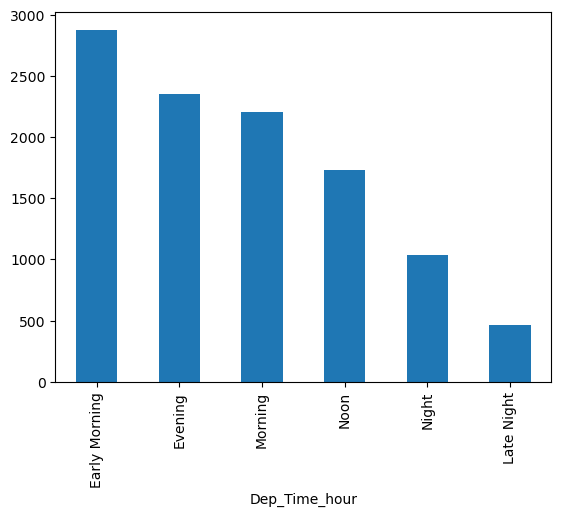

In [434]:
count.plot(kind= "bar")

In [435]:
#making it interactive using plotly and chart_studio

In [436]:
!pip install plotly


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [437]:
!pip install chart_studio
!pip install cufflinks


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [438]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot , iplot , init_notebook_mode , download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

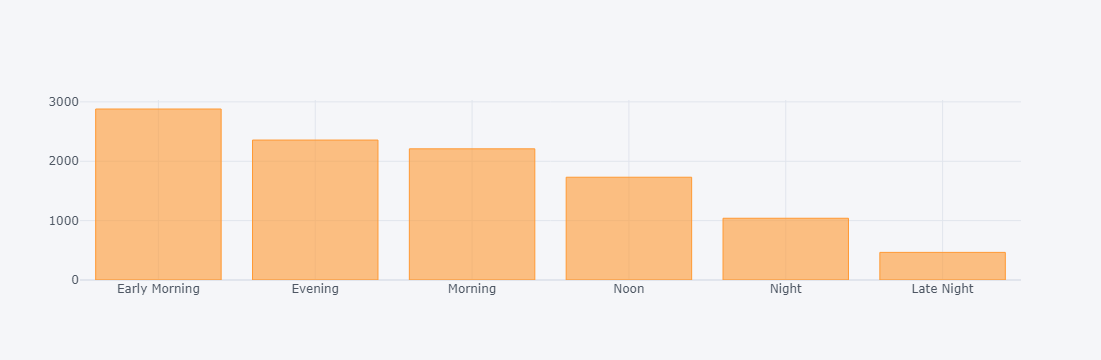

In [439]:
pdd['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar', color= 'Orange')

In [440]:
#Here is a problem after observation, that in duration-- 19H time -Minutes are 0, and in 54m time- Hours are 0 so we have to perform it also

In [441]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' +'0m'
        
    return x

In [442]:
#pdd['Duration']=  pdd['Duration'].apply(preprocess_duration)
pdd['Duration'] = pdd['Duration'].apply(preprocess_duration)

In [443]:
pdd['Duration'].iloc[1]

'7h 25m'

In [444]:
#now extract hours and minute as separate columns--

In [445]:
'2h 50m'.split()

['2h', '50m']

In [446]:
'2h 50m'.split(' ')

['2h', '50m']

In [447]:
'2h 50m'.split()[0]

'2h'

In [448]:
#in python 2's index= 0 , and h's index= -1. i.e reverse indexing happen and that too till -1, aryan: a= 3, r=2, y=1, a=0, n=-1

In [449]:
'2h 50m'.split()[0][0:-1]

'2'

In [450]:
type('2h 50m'.split()[0][0:-1])

str

In [451]:
int('2h 50m'.split()[0][0:-1])

2

In [452]:
int('2h 50m'.split()[1][0:-1])

50

In [453]:
pdd['Duration_hours']= pdd['Duration'].apply(lambda x : int(x.split()[0][0:-1]))

In [454]:
pdd['Duration_mins']= pdd['Duration'].apply(lambda x : int(x.split()[1][0:-1]))

In [455]:
pdd.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [456]:
#Checking whether duration has effect on price or not
#For this first we have to convert duration in minutes
#Basically 2h 50 m= 170min 

In [457]:
pdd["Duration_Total_mins"]= pdd["Duration"].str.replace('h', '*60').str.replace(' ', '+').str.replace('m','*1')

In [458]:
pdd.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_Total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,2*60+50*1
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,7*60+25*1


In [459]:
pdd["Duration_Total_mins"]=pdd["Duration_Total_mins"].apply(eval)  

In [460]:
pdd.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_Total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445


In [461]:
#To find relation between duration and price we can make a plot (scatter or regression plot) regression can also tell best fit

<Axes: xlabel='Duration_Total_mins', ylabel='Price'>

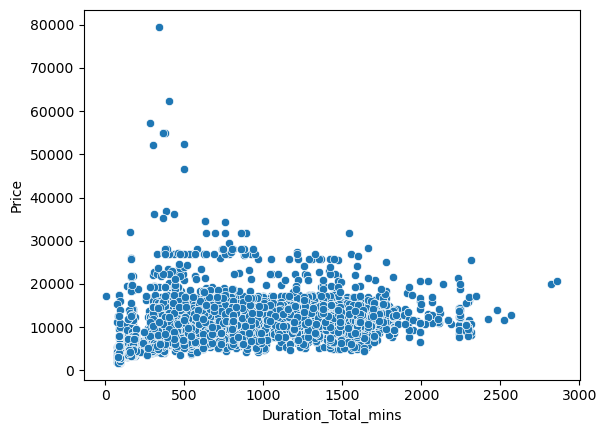

In [462]:
sns.scatterplot(x="Duration_Total_mins" , y="Price" ,  data=pdd)

In [463]:
#To add stops also we can use hue parameter of seaborn

<Axes: xlabel='Duration_Total_mins', ylabel='Price'>

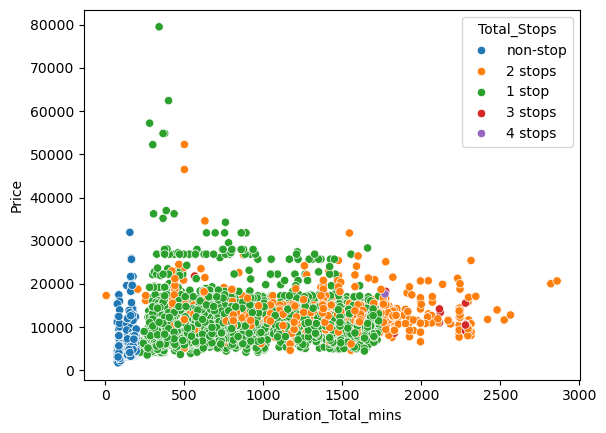

In [464]:
sns.scatterplot(x="Duration_Total_mins" , y="Price" ,hue="Total_Stops"  ,data=pdd)

In [465]:
#To form a regression plot---

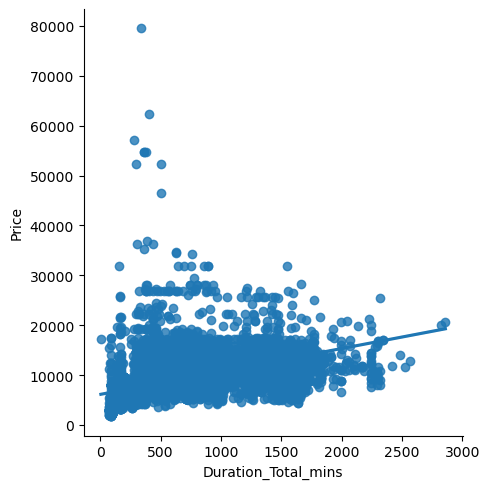

In [466]:
sns.lmplot(x="Duration_Total_mins" , y="Price" ,  data=pdd)

In [467]:
#The straight line tells that as duration increases price also increase for most i.e if slope=0.6 than for 1 unit 0.6 price will increase and for 100, 60 price will increase

In [468]:
#To find on which route jet airways is extremely used
# Airline vs price analysis

In [469]:
pdd[pdd['Airline']== 'Jet Airways'].groupby("Route").size().sort_values(ascending= False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

In [470]:
#Find price vs airline (min, 25th percentile, median,mean,75th percentile, max)== boxplot

In [471]:
pdd.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_Total_mins'],
      dtype='object')

<Axes: xlabel='Airline', ylabel='Price'>

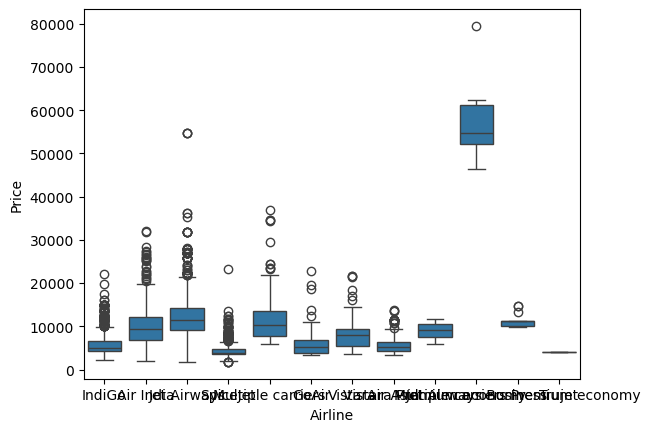

In [472]:
sns.boxplot(y= 'Price', x= 'Airline' , data=pdd)

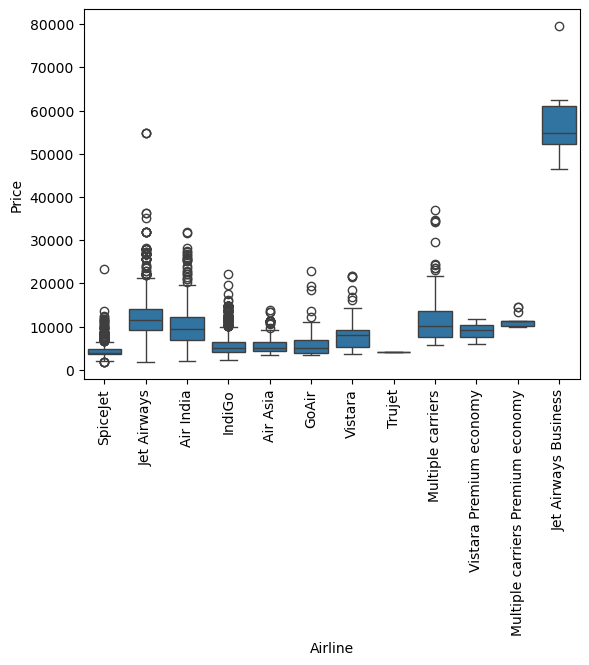

In [473]:
#As overlapping is happening we will rotate the axis--
sns.boxplot(y= 'Price', x= 'Airline' , data=pdd.sort_values("Price"))
plt.xticks(rotation="vertical")
plt.show()

In [474]:
#Applying one-hot on pdd--
#Machine learning work only on numbers or on vectors so we hv to convert string to numbers which is known as feature encoding

In [475]:
cat_col=[col for col in pdd.columns  if pdd[col].dtype=="object"]

In [476]:
num_col=[col for col in pdd.columns  if pdd[col].dtype!="object"]

In [477]:
pdd['Source'].apply(lambda x : 1 if x=='Banglore' else 0) #We are doiing feature encoding here as we will add column source bangalore and that will be in binary 1's or 0's.. 1 means source is bangalore while 0 means source is not bangalore

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [478]:
for sub_category in pdd['Source'].unique():
    pdd['Source_'+sub_category]= pdd['Source'].apply(lambda x:1 if x==sub_category else 0)

In [479]:
pdd.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_Total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [480]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [481]:
pdd['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [482]:
pdd['Airline'].nunique()

12

In [483]:
#To perform-- Target guided Encoding on data and manual encoding on data

In [484]:
#to trget price by airline--
airlines = pdd.groupby(['Airline'])['Price'].mean().sort_values().index

In [485]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [486]:
#ordering airlines as per their mean price i.e trujet=0, spicejet=1, Airasia=2......jet airways=10, jetairways busi=11.. so making a dictionary (key, value)pair i.e (trujet,0)

In [487]:
dict_airlines = {key:index for index , key in enumerate(airlines , 0)}
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [488]:
pdd['Airline']= pdd['Airline'].map(dict_airlines)

In [489]:
pdd.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_Total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [490]:
pdd['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [491]:
#Two delhi present error in data
pdd['Destination'].replace("New Delhi", "Delhi", inplace= True)

In [492]:
#Now feature encoding of destination and price--

dest = pdd.groupby(['Destination'])['Price'].mean().sort_values().index
dest


Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [493]:
dict_dest = {key:index for index , key in enumerate(dest , 0)}
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [494]:
pdd["Destination"] = pdd["Destination"]. map(dict_dest)

In [495]:
pdd.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_Total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [496]:
#Now performing manual encoding on data and remove unnecessary features for ML

In [497]:
pdd['Total_Stops'].unique()   #This is ordinally data so we will do label coding

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [498]:
#We can map this stops (string) in int i.e non stop =0, 1 stop= 1 , 2 stop=2 , 3 stop= 3, 4 stop =4

In [499]:
stop = {'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}

In [500]:
pdd['Total_Stops']=pdd['Total_Stops'].map(stop)

In [501]:
pdd.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_Total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [502]:
#Remove unnecessary data--
pdd.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_Total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [503]:
pdd['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [504]:
#Most of the columns hv no info
pdd.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_Total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [505]:
#By observation stops is dependent on route so we dont need route, we hv source destination and no.of stops
#We can also remove date of journey,  duration total mins, source, journey year(it is 2019)

In [506]:
pdd.drop(columns=['Date_of_Journey' , 'Additional_Info' , 'Duration_Total_mins' , 'Source' , 'Journey_year'] , axis=1 , inplace=True)

In [507]:
pdd.drop(columns=['Route'] , axis=1 , inplace=True)


In [508]:
pdd.drop(columns=['Duration'] , axis=1 , inplace=True)

# we can drop "Duration" feature as we have extracted "Duration hour" & "Duration Minute"

In [509]:
pdd.head(2)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0


In [510]:
pdd.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
Price                  int64
Journey_day            int32
Journey_month          int32
Dep_Time_hour          int32
Dep_Time_minute        int32
Arrival_Time_hour      int32
Arrival_Time_minute    int32
Duration_hours         int64
Duration_mins          int64
Source_Banglore        int64
Source_Kolkata         int64
Source_Delhi           int64
Source_Chennai         int64
Source_Mumbai          int64
dtype: object

In [511]:
#now dealing with outliners i.e values which are low values and high values. It can be due to typing mistake 
#We can find outliners by visualisations--

In [512]:
def plot(df, col):
    fig , (ax1 , ax2 , ax3) = plt.subplots(3,1) #3 rows and 1 columns
    
    sns.distplot(df[col] , ax=ax1)
    sns.boxplot(df[col] , ax=ax2)
    sns.distplot(df[col] , ax=ax3 , kde=False)  

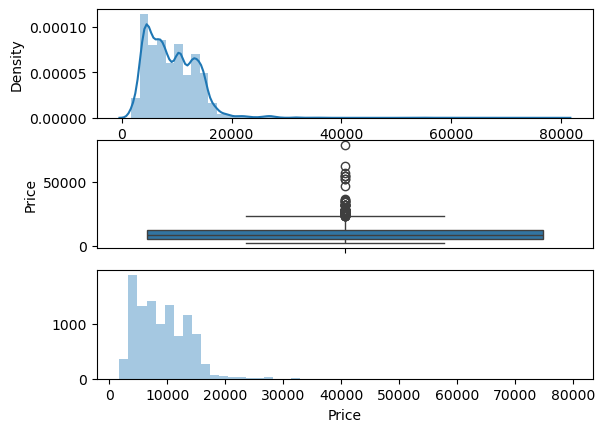

In [513]:
plot(pdd, 'Price')

In [514]:
#In first graph that curved line is skewness which is getting flat on the right so it is right skewed we can apply IQR approach--

In [515]:
#IQR approach--
q1= pdd['Price'].quantile(0.25)
q3= pdd['Price'].quantile(0.75)
iqr= q3-q1
maximum = q3+ 1.5*iqr
minimum = q1- 1.5*iqr

In [516]:
maximum

23017.0

In [517]:
minimum

-5367.0

In [518]:
len(([price for price in pdd['Price'] if price>maximum or price< minimum]))

94

In [519]:
pdd['Price']= np.where(pdd['Price']>=35000, pdd['Price'].median() ,  pdd['Price'])
         #35k is taken by me by studying some data where 35k is most for domestic flights 

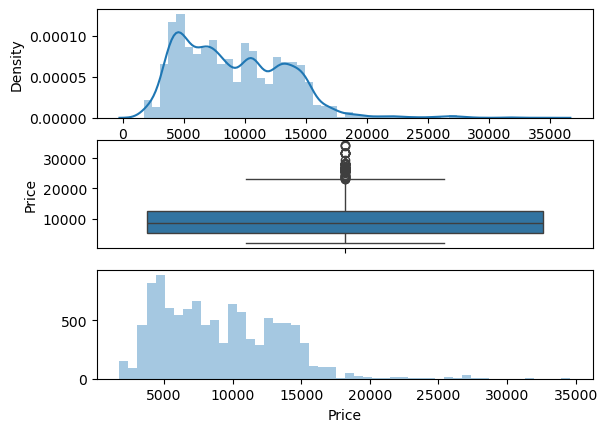

In [520]:
plot (pdd, 'Price')

In [521]:
#Now we will do feature selection ..
#dependent data/feature= price
#independent data/feature= source, destination,etc

In [522]:
#We are using mutual information selection i.e whether two random  variable are dependent on each other

In [523]:
#mutual information metric--- if near to 0= not dependent,.. if near to one highly dependent

In [524]:
y= pdd['Price']   
X= pdd.drop(['Price'], axis=1)  #all columns except price

In [525]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [526]:
from sklearn.feature_selection import mutual_info_regression

In [527]:
imp = mutual_info_regression(X,y)         #X,y mutual dependency will be told

In [528]:
imp

array([1.31670977, 1.05952549, 0.78651847, 0.37844982, 0.62879139,
       0.93581705, 0.75847219, 1.14777944, 0.91005199, 1.11275151,
       0.68041796, 0.38807198, 0.45556204, 0.52056725, 0.14051616,
       0.19962283])

In [529]:
imp_info= pd.DataFrame(imp , index= X.columns)

In [530]:
imp_info

,0
Airline,1.316710
Destination,1.059525
Total_Stops,0.786518
Journey_day,0.378450
Journey_month,0.628791
Dep_Time_hour,0.935817
Dep_Time_minute,0.758472
Arrival_Time_hour,1.147779
Arrival_Time_minute,0.910052
Duration_hours,1.112752


In [531]:
imp_info.columns= ['importance']

In [532]:
imp_info.sort_values(by= 'importance', ascending= False)

,importance
Airline,1.316710
Arrival_Time_hour,1.147779
Duration_hours,1.112752
Destination,1.059525
Dep_Time_hour,0.935817
Arrival_Time_minute,0.910052
Total_Stops,0.786518
Dep_Time_minute,0.758472
Duration_mins,0.680418
Journey_month,0.628791


In [533]:
#All features are important so we cant drop

In [534]:
imp_info.columns= ['importance']
imp_info.sort_values(by= 'importance', ascending= False)

,importance
Airline,1.316710
Arrival_Time_hour,1.147779
Duration_hours,1.112752
Destination,1.059525
Dep_Time_hour,0.935817
Arrival_Time_minute,0.910052
Total_Stops,0.786518
Dep_Time_minute,0.758472
Duration_mins,0.680418
Journey_month,0.628791


In [535]:
#Building Machine learning model--

In [536]:
from sklearn.model_selection import train_test_split

In [537]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.25 , random_state=42)

In [538]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))      

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [539]:
X_train.shape, X_test.shape , y_train.shape , y_test.shape 

((8011, 16), (2671, 16), (8011,), (2671,))

In [540]:
#X_train and y_train are the features and target for training.
#X_test and y_test are the features and target for testing
#25% of the data is used for testing and 75% for training

In [541]:
from sklearn.ensemble import RandomForestRegressor

In [542]:
ml_model = RandomForestRegressor()

In [543]:
ml_model.fit(X_train , y_train) 

RandomForestRegressor()

In [544]:
y_pred= ml_model.predict(X_test)
y_test.values[0]

16655.0

In [545]:
y_pred

array([16840.07,  5407.1 ,  8783.86, ...,  3539.8 ,  6407.13,  6838.01])

In [546]:
y_test.values[0] , y_test.values[1], y_test.values[2] #to match with predicted data and we can see our model is closely accurate

(16655.0, 4959.0, 9187.0)

In [547]:
#The line ml_model.predict(X_test) means that we are using the trained model (ml_model) to make predictions on the test data (X_test). 

In [548]:
#ml_model.predict(X_test) uses the trained model to predict the target values for the test set.

In [549]:
from sklearn import metrics

In [550]:
accuracy= metrics.r2_score(y_test , y_pred) 

In [551]:
perc_acc= accuracy*100
print ("Accuracy of our model is" , perc_acc)

Accuracy of our model is 81.10475026960833


In [552]:
#To save model we need pickle

In [553]:
import pickle

In [554]:
file = open('Data_Train_open.xlsx' , 'wb')     

In [555]:
pickle.dump(ml_model , file)  #saving this model with our file, pickle.dump(ml_model, file) serializes the trained model and saves it to the file.

In [556]:
model= open('Data_Train_open.xlsx' , 'rb') 

In [557]:
forest = pickle.load(model)      #pickle.load(model) deserializes the model from the file.

In [558]:
y_pred2= forest.predict(X_test)  #forest.predict(X_test) uses the loaded model to make predictions on the test set.

In [559]:
metrics.r2_score(y_test , y_pred) #metrics.r2_score(y_test, y_pred2) calculates the R^2 score for the loaded model’s predictions, 

0.8110475026960833

In [560]:
#automating ml pipeline defining our own Evaluation metric--

In [561]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100  

In [562]:
mape(y_test , y_pred)

13.222615081816055

In [563]:
"""
Own evaluation metric..
just pass ml algo &  get several results like--
Training score, predictions, r2_score, mse, mae, rmse, mape,distribution of error
"""

'\nOwn evaluation metric..\njust pass ml algo &  get several results like--\nTraining score, predictions, r2_score, mse, mae, rmse, mape,distribution of error\n'

In [564]:
from sklearn import metrics

In [565]:
def predict(ml_model):
    model = ml_model.fit(X_train , y_train)
    print('Training score : {}'.format(model.score(X_train , y_train)))
    y_predection = model.predict(X_test)
    print('predictions are : {}'.format(y_predection))
    print('\n')
    r2_score = metrics.r2_score(y_test , y_predection)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_predection)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test , y_predection)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_predection))))
    print('MAPE : {}'.format(mape(y_test , y_predection)))
    sns.distplot(y_test - y_predection)

Training score : 0.9514802520810864
predictions are : [16784.71  5280.43  8885.72 ...  3507.69  6430.96  6888.94]


r2 score : 0.8129265219815127
MAE : 1172.6245782395981
MSE : 3641871.578083556
RMSE : 1908.3688265331616
MAPE : 13.147051190460207


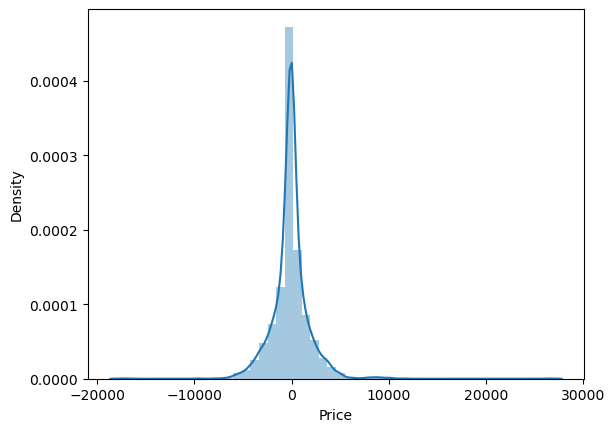

In [566]:
predict(RandomForestRegressor())

In [567]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.966591628243878
predictions are : [16840.  4959.  8610. ...  3419.  5797.  6442.]


r2 score : 0.6760061875162542
MAE : 1412.313652814177
MSE : 6307381.835510004
RMSE : 2511.4501459336207
MAPE : 15.614289532644065


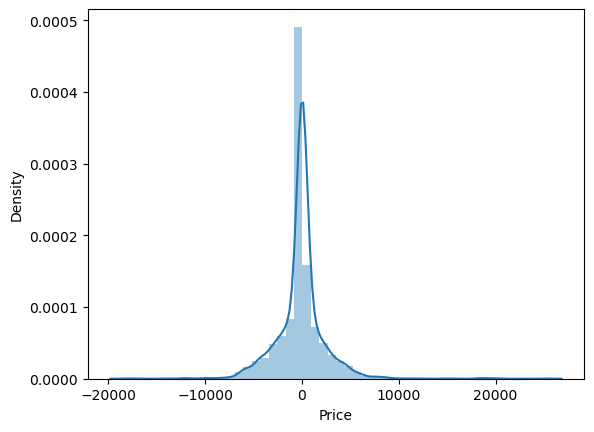

In [568]:
predict(DecisionTreeRegressor())

In [569]:
from sklearn.model_selection import RandomizedSearchCV   #cv= cross validation

In [570]:
reg_rf = RandomForestRegressor() #initialising the model

In [571]:
np.linspace(start =100 , stop=1200 , num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [572]:
# Number of trees in random forest--
n_estimators = [int(x) for x in np.linspace(start =100 , stop=1200 , num=6)]

# Number of features to consider at every split--
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree--
max_depth = [int(x) for x in np.linspace(start =5 , stop=30 , num=4)]

# Minimum number of samples required to split a node--
min_samples_split = [5,10,15,100]


In [573]:
# Create the random grid or hyper-parameter space

random_grid = {
    'n_estimators' : n_estimators , 
    'max_features' : max_features , 
    'max_depth' : max_depth , 
    'min_samples_split' : min_samples_split
}

In [574]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [575]:
rf_random = RandomizedSearchCV(estimator=reg_rf , param_distributions=random_grid , cv=3 , n_jobs=-1 , verbose=2)

In [576]:
rf_random.fit(X_train , y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [577]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 21}

In [578]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=21, max_features='sqrt', min_samples_split=10,
                      n_estimators=1200)

In [579]:
rf_random.best_score_

0.8038229179091679